# Capstone Project: Fraud Detection

In the realm of e-commerce, the fine line between security and convenience is navigated through the adept implementation of fraud prevention systems. As you face the inconvenience of a declined card at the checkout, it's these systems that are the unsung heroes guarding against unauthorized transactions. Partnering with IEEE-CIS, Vesta Corporation is on the forefront of refining these systems, leveraging a vast dataset from real-world transactions to benchmark machine learning models. This EDA report delves into the intricacies of transaction data, aiming to enhance the precision of fraud detection and, by extension, your shopping experience.


[Link to Kaggle Dataset IEEE-CIS Fraud Detection](https://www.kaggle.com/competitions/ieee-fraud-detection/data?select=train_identity.csv)

In [ ]:
# important packages for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm


In [ ]:
# Mount Google Drive (replace with your Google Drive path)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Wrangling

In [ ]:
# Kaggle API setup (replace '<path-to-your-kaggle-json>' with your Kaggle JSON path)
# Make sure to keep your kaggle.json file private
import os
os.mkdir('~/.kaggle')
os.system('cp <path-to-your-kaggle-json> ~/.kaggle/')
os.chmod('~/.kaggle/kaggle.json', 600)

# Download datasets from Kaggle (use appropriate Kaggle dataset links)
os

 85% 100M/118M [00:00<00:00, 155MB/s] 
100% 118M/118M [00:00<00:00, 129MB/s]
Archive:  /content/ieee-fraud-detection.zip
  inflating: sample_submission.csv   
  inflating: test_identity.csv       
  inflating: test_transaction.csv    
  inflating: train_identity.csv      
  inflating: train_transaction.csv   


In [ ]:
# paths and reading files to dataframe
train_id_path = '/content/train_identity.csv'
train_trans_path = '/content/train_transaction.csv'

id_train_df = pd.read_csv(train_id_path)
trans_train_df = pd.read_csv(train_trans_path)

In [ ]:
id_train_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
id_train_df.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [ ]:
id_train_df.shape

(144233, 41)

In [ ]:
trans_train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
trans_train_df.shape

(590540, 394)

In [ ]:
trans_train_df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [ ]:
# left join to ensure that no transaction information is excluded
data = pd.merge(trans_train_df, id_train_df, on='TransactionID', how='left')

In [ ]:
data.shape

(590540, 434)

In [ ]:
# take a look at the train data
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
# check nas
missing_percent = (data.isnull().sum())/len(data)

In [ ]:
missing_percent.sort_values(ascending=False)

id_24            0.991962
id_25            0.991310
id_07            0.991271
id_08            0.991271
id_21            0.991264
                   ...   
C3               0.000000
C2               0.000000
C1               0.000000
isFraud          0.000000
TransactionID    0.000000
Length: 434, dtype: float64

# EDA

## Target Distribution

In [ ]:
data.shape

(590540, 434)

In [ ]:
data.select_dtypes(include=['object', 'category']).columns


Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

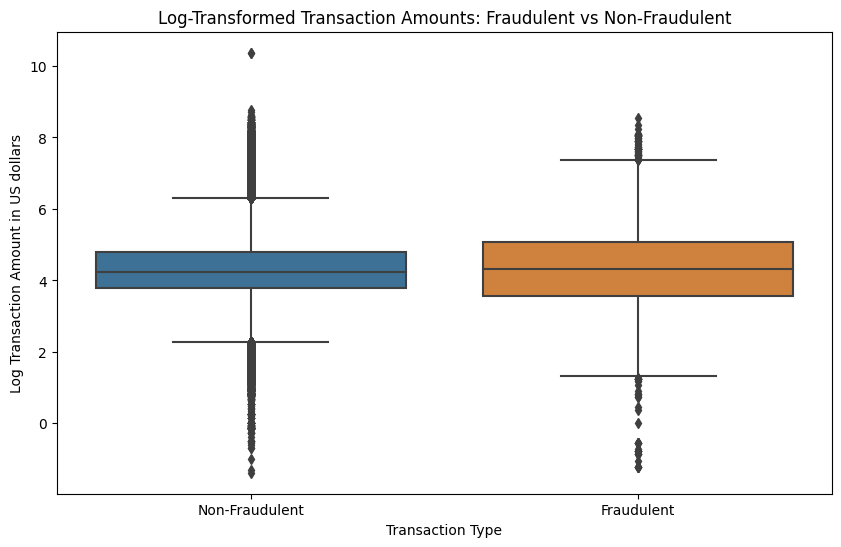

In [ ]:
plt.figure(figsize=(10, 6))

# Create the box plot directly using the transformed data
sns.boxplot(
    x=data['isFraud'].apply(lambda x: 'Fraudulent' if x == 1 else 'Non-Fraudulent'),
    y=data['TransactionAmt'].apply(np.log),
    saturation=0.60
)
plt.title('Log-Transformed Transaction Amounts: Fraudulent vs Non-Fraudulent')
plt.xlabel('Transaction Type')
plt.ylabel('Log Transaction Amount in US dollars')

# Show the plot
plt.show()

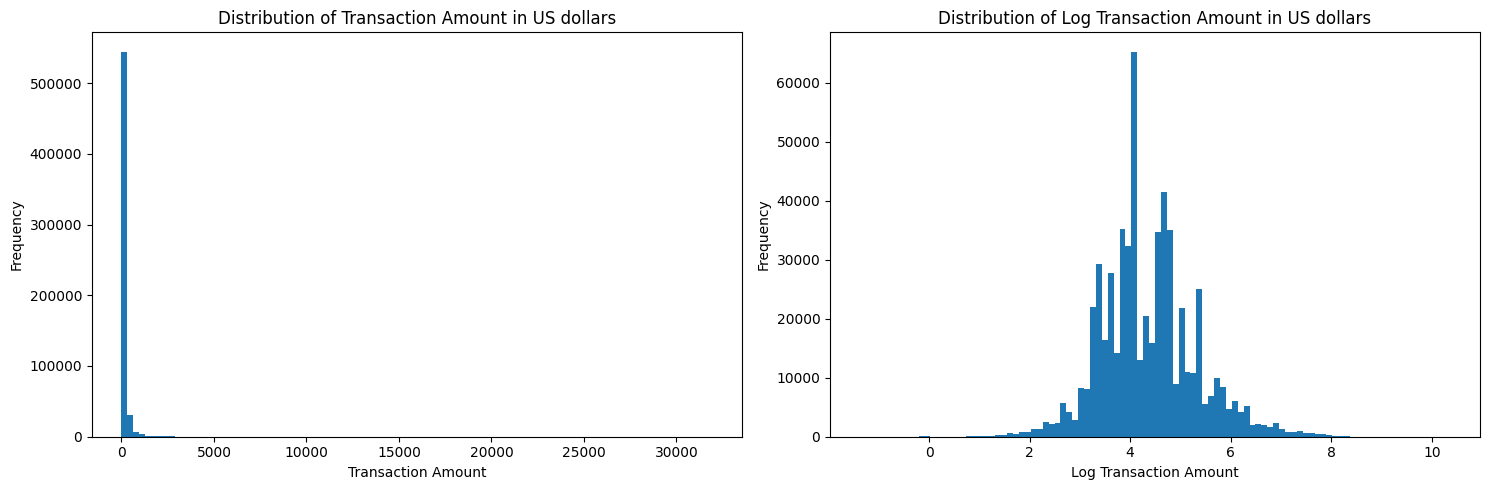

In [ ]:
plt.figure(figsize=(15, 5))

# First subplot for normal transactions
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(data['TransactionAmt'], bins=100)
plt.title('Distribution of Transaction Amount in US dollars')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Second subplot for log-transformed transactions
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(data['TransactionAmt'].apply(np.log), bins=100)
plt.title('Distribution of Log Transaction Amount in US dollars')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from 'TransactionAmt'
data_filtered = remove_outliers(data, 'TransactionAmt')

In [ ]:
# Separate fraud and non-fraud transactions
fraud_transactions = data_filtered[data_filtered['isFraud'] == 1]
non_fraud_transactions = data_filtered[data_filtered['isFraud'] == 0]

plt.figure(figsize=(15, 5))

# First subplot for normal transactions
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(non_fraud_transactions['TransactionAmt'], bins=100, color='blue', alpha=0.5, label='Non-Fraud')
plt.hist(fraud_transactions['TransactionAmt'], bins=100, color='red', alpha=0.5, label='Fraud')
plt.title('Distribution of Transaction Amount in US dollars (Without Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

# Second subplot for log-transformed transactions
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(non_fraud_transactions['TransactionAmt'].apply(np.log), bins=100, color='blue', alpha=0.5, label='Non-Fraud')
plt.hist(fraud_transactions['TransactionAmt'].apply(np.log), bins=100, color='red', alpha=0.5, label='Fraud')
plt.title('Distribution of Log Transaction Amount in US dollars (Without Outliers)')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
data['TransactionAmt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

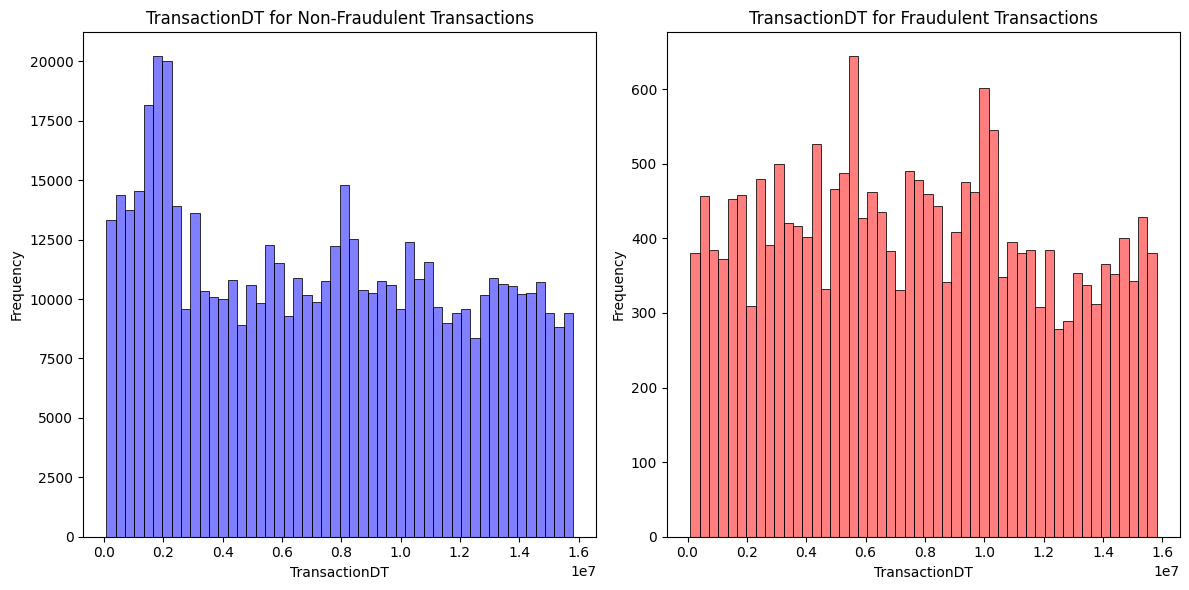

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for non-fraudulent transactions
plt.subplot(1, 2, 1)
sns.histplot(data[data['isFraud'] == 0]['TransactionDT'], kde=False, color='blue', bins=50, alpha=0.5)
plt.title('TransactionDT for Non-Fraudulent Transactions')
plt.xlabel('TransactionDT')
plt.ylabel('Frequency')

# Histogram for fraudulent transactions
plt.subplot(1, 2, 2)
sns.histplot(data[data['isFraud'] == 1]['TransactionDT'], kde=False, color='red', bins=50, alpha=0.5)
plt.title('TransactionDT for Fraudulent Transactions')
plt.xlabel('TransactionDT')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
def make_hour_feature(df, tname='TransactionDT'):
    """
    Creates an hour of the day feature, encoded as 0-23.
    """
    hours = df[tname] / (3600)
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

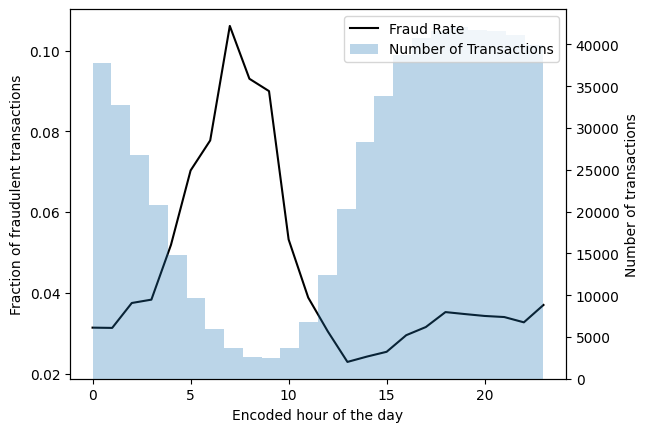

In [ ]:
# Create the 'hour' feature
data['hour_of_the_day'] = make_hour_feature(data)

plt.plot(data.groupby('hour_of_the_day')['isFraud'].mean(), color='k', label='Fraud Rate')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(data['hour_of_the_day'], alpha=0.3, bins=24, label='Number of Transactions')
ax.set_xlabel('Encoded hour of the day')
ax.set_ylabel('Fraction of fraudulent transactions')

ax2.set_ylabel('Number of transactions')

# Add a legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()


## Sampling Data

In [ ]:
# Sample 1000 fraud and 1000 non-fraud examples to plot
sample_data = pd.concat([data.loc[data['isFraud'] == 0].sample(1000),
          data.loc[data['isFraud'] == 1].sample(1000)])

In [ ]:
# Split the data into train and test sets
x_sample_train, x_sample_test, y_sample_train, y_sample_test = train_test_split(sample_data.drop('isFraud', axis=1), sample_data['isFraud'], test_size=0.25, random_state=42)

# Identify categorical and numerical columns
categorical_cols = x_sample_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = x_sample_train.select_dtypes(include=['number']).columns

# Create imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical data
x_sample_train[numerical_cols] = num_imputer.fit_transform(x_sample_train[numerical_cols])
x_sample_test[numerical_cols] = num_imputer.transform(x_sample_test[numerical_cols])

# Impute categorical data
x_sample_train[categorical_cols] = cat_imputer.fit_transform(x_sample_train[categorical_cols])
x_sample_test[categorical_cols] = cat_imputer.transform(x_sample_test[categorical_cols])

# Apply pd.get_dummies() and combine with original data
x_sample_train = pd.concat([pd.DataFrame(x_sample_train, columns=numerical_cols), pd.get_dummies(pd.DataFrame(x_sample_train, columns=categorical_cols))], axis=1)
x_sample_test = pd.concat([pd.DataFrame(x_sample_test, columns=numerical_cols), pd.get_dummies(pd.DataFrame(x_sample_test, columns=categorical_cols))], axis=1)

# Align the columns in the train and test sets
x_sample_train, x_sample_test = x_sample_train.align(x_sample_test, join='outer', axis=1, fill_value=0)

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the classifier on the training data
rf.fit(x_sample_train, y_sample_train)

# Predict the labels for the test data
y_pred = rf.predict(x_sample_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_sample_test, y_pred)
print('Model with all 800+ Features:\nAccuracy:', accuracy)

# Evaluate additional metrics
recall = recall_score(y_sample_test, y_pred)
f1 = f1_score(y_sample_test, y_pred)
roc_auc = roc_auc_score(y_sample_test, rf.predict_proba(x_sample_test)[:, 1])

print('Recall:', recall)
print('F1 Score:', f1)
print('ROC AUC:', roc_auc)

# feature importances
feature_importances = rf.feature_importances_

Model with all 800+ Features:
Accuracy: 0.802
Recall: 0.7901234567901234
F1 Score: 0.7950310559006211
ROC AUC: 0.8785928167683464


### Random Forest Feature Selection

In [ ]:
def apply_pca(data, group_columns, target_column, n_components=2, title=''):
    """
    Apply PCA to a group of columns.

    Parameters:
    data (DataFrame): The dataset.
    group_columns (list): List of column names for the group.
    target_column (str): Name of the target column.
    n_components (int): Number of PCA components to keep.

    Returns:
    DataFrame: Transformed dataset with PCA components.
    """

    # Create a copy of the group data to avoid SettingWithCopyWarning
    group_data = data[group_columns].copy()

    # Identify categorical and numerical columns
    categorical_cols = group_data.select_dtypes(include=['object', 'category']).columns
    numerical_cols = group_data.select_dtypes(include=['number']).columns

    # Create imputers
    num_imputer = SimpleImputer(strategy='median')

    # Impute numerical data
    group_data[numerical_cols] = num_imputer.fit_transform(group_data[numerical_cols])

    # Check if there are categorical columns to process
    if len(categorical_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        group_data[categorical_cols] = cat_imputer.fit_transform(group_data[categorical_cols])
        group_data = pd.get_dummies(group_data, columns=categorical_cols)

    # Standardize the group data
    scaler = StandardScaler()
    group_data_scaled = scaler.fit_transform(group_data)

    # Apply PCA
    pca = PCA(n_components=n_components)
    transformed_features = pca.fit_transform(group_data_scaled)

    # # Plot the explained variance ratio
    # plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
    # plt.xlabel('PCA Components for ')
    # plt.ylabel('Variance %')
    # plt.title(f'Explained Variance Ratio for {title}')
    # plt.xticks(range(pca.n_components_))
    # plt.show()

    # PCA naming purposes
    letter = title.split(' ')[0]

    # Create a DataFrame with PCA components
    pca_columns = [f'PCA_{letter}{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(transformed_features, columns=pca_columns)

    # Drop original group columns and concatenate the PCA components
    df_reduced = data.drop(group_columns, axis=1)
    df_reduced = pd.concat([df_reduced, pca_df], axis=1)

    return df_reduced

In [ ]:
# grouped columns
c_columns = [c for c in data.columns if c.startswith('C') and c[1:].isdigit()]
v_columns = [v for v in data.columns if v.startswith('V') and v[1:].isdigit()]
d_columns = [d for d in data.columns if d.startswith('D') and d[1:].isdigit()]

In [ ]:
# Apply the function to each group
transformed_data_c = apply_pca(data, c_columns, 'isFraud',1, 'C Components')
transformed_data_v = apply_pca(data, v_columns, 'isFraud',1, 'V Components')
transformed_data_d = apply_pca(data, d_columns, 'isFraud',1, 'D Components')

In [ ]:
# Copy the original data
transformed_data = data.copy()

# Drop columns that went through PCA
#transformed_data.drop(c_columns + v_columns + d_columns, axis=1, inplace=True)
transformed_data.drop(c_columns + v_columns+d_columns, axis=1, inplace=True)
# Extract PCA components
pca_components_c = transformed_data_c.filter(like='PCA')
pca_components_v = transformed_data_v.filter(like='PCA')
pca_components_d = transformed_data_d.filter(like='PCA')

# Concatenate the PCA components to the original dataset
transformed_data = pd.concat([transformed_data, pca_components_c, pca_components_v, pca_components_d], axis=1)
#transformed_data = pd.concat([transformed_data, pca_components_c,pca_components_v], axis=1)


# Sample with PCA components: 1000 fraud and 1000 non-fraud examples
trans_sample_data = pd.concat([
    transformed_data[transformed_data['isFraud'] == 0].sample(2000),
    transformed_data[transformed_data['isFraud'] == 1].sample(2000)
])

# Split the data into train and test sets
x_smp_train, x_smp_test, y_smp_train, y_smp_test = train_test_split(
    trans_sample_data.drop('isFraud', axis=1),
    trans_sample_data['isFraud'],
    test_size=0.25,
    random_state=42
)

# Identify categorical and numerical columns excluding PCA columns
pca_columns = [col for col in x_smp_train.columns if col.startswith('PCA')]
categorical_cols = x_smp_train.select_dtypes(include=['object', 'category']).columns.difference(pca_columns)
numerical_cols = x_smp_train.select_dtypes(include=['number']).columns.difference(pca_columns)

# Create imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical data
x_smp_train[numerical_cols] = num_imputer.fit_transform(x_smp_train[numerical_cols])
x_smp_test[numerical_cols] = num_imputer.transform(x_smp_test[numerical_cols])

# Impute categorical data
x_smp_train[categorical_cols] = cat_imputer.fit_transform(x_smp_train[categorical_cols])
x_smp_test[categorical_cols] = cat_imputer.transform(x_smp_test[categorical_cols])

# Apply pd.get_dummies() and combine with original data
x_smp_train = pd.concat([x_smp_train[numerical_cols.union(pca_columns)], pd.get_dummies(x_smp_train[categorical_cols])], axis=1)
x_smp_test = pd.concat([x_smp_test[numerical_cols.union(pca_columns)], pd.get_dummies(x_smp_test[categorical_cols])], axis=1)

# Align the columns in the train and test sets
x_smp_train, x_smp_test = x_smp_train.align(x_smp_test, join='outer', axis=1, fill_value=0)

# Create and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_smp_train, y_smp_train)

# Get the feature importances and select features above the threshold
threshold = 0.005
high_importance_features = x_smp_train.columns[rf.feature_importances_ > threshold]

# Reduce training and testing sets to high importance features
x_smp_train_reduced = x_smp_train[high_importance_features]
x_smp_test_reduced = x_smp_test[high_importance_features]

# Re-train the classifier on the reduced feature set
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(x_smp_train_reduced, y_smp_train)

# Predict the labels for the reduced test data
y_pred_reduced = rf_reduced.predict(x_smp_test_reduced)

# Evaluate the accuracy of the classifier with reduced features
accuracy_reduced = accuracy_score(y_smp_test, y_pred_reduced)
print('Model with Reduced Features:\nAccuracy:', accuracy_reduced)

# Evaluate additional metrics for the reduced model
recall_reduced = recall_score(y_smp_test, y_pred_reduced)
f1_reduced = f1_score(y_smp_test, y_pred_reduced)
roc_auc_reduced = roc_auc_score(y_smp_test, rf_reduced.predict_proba(x_smp_test_reduced)[:, 1])

print('Recall:', recall_reduced)
print('F1 Score:', f1_reduced)
print('ROC AUC:', roc_auc_reduced)



Model with Reduced Features:
Accuracy: 0.781
Recall: 0.792016806722689
F1 Score: 0.7749229188078107
ROC AUC: 0.86207822823786


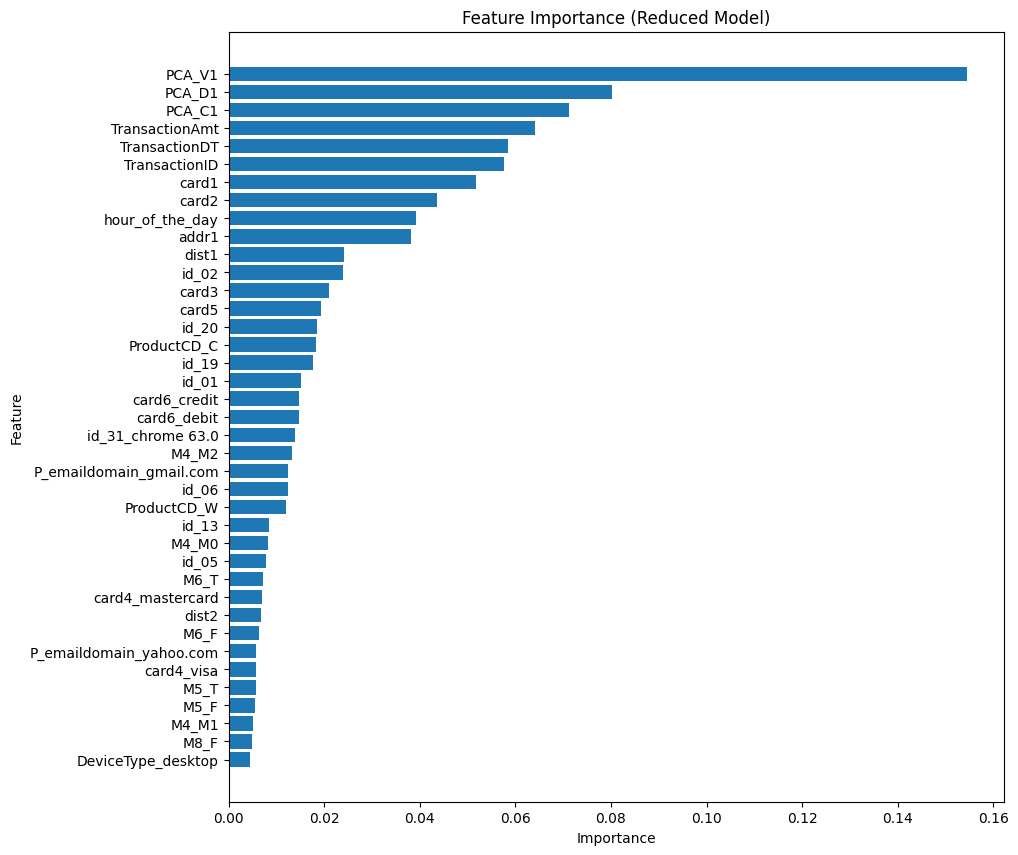

In [ ]:
# Feature importances from the reduced model
feature_importances_reduced = rf_reduced.feature_importances_

# Plot the feature importances
sorted_idx = feature_importances_reduced.argsort()
plt.figure(figsize=(10, 10))
plt.barh(x_smp_train_reduced.columns[sorted_idx], feature_importances_reduced[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Reduced Model)')
plt.show()

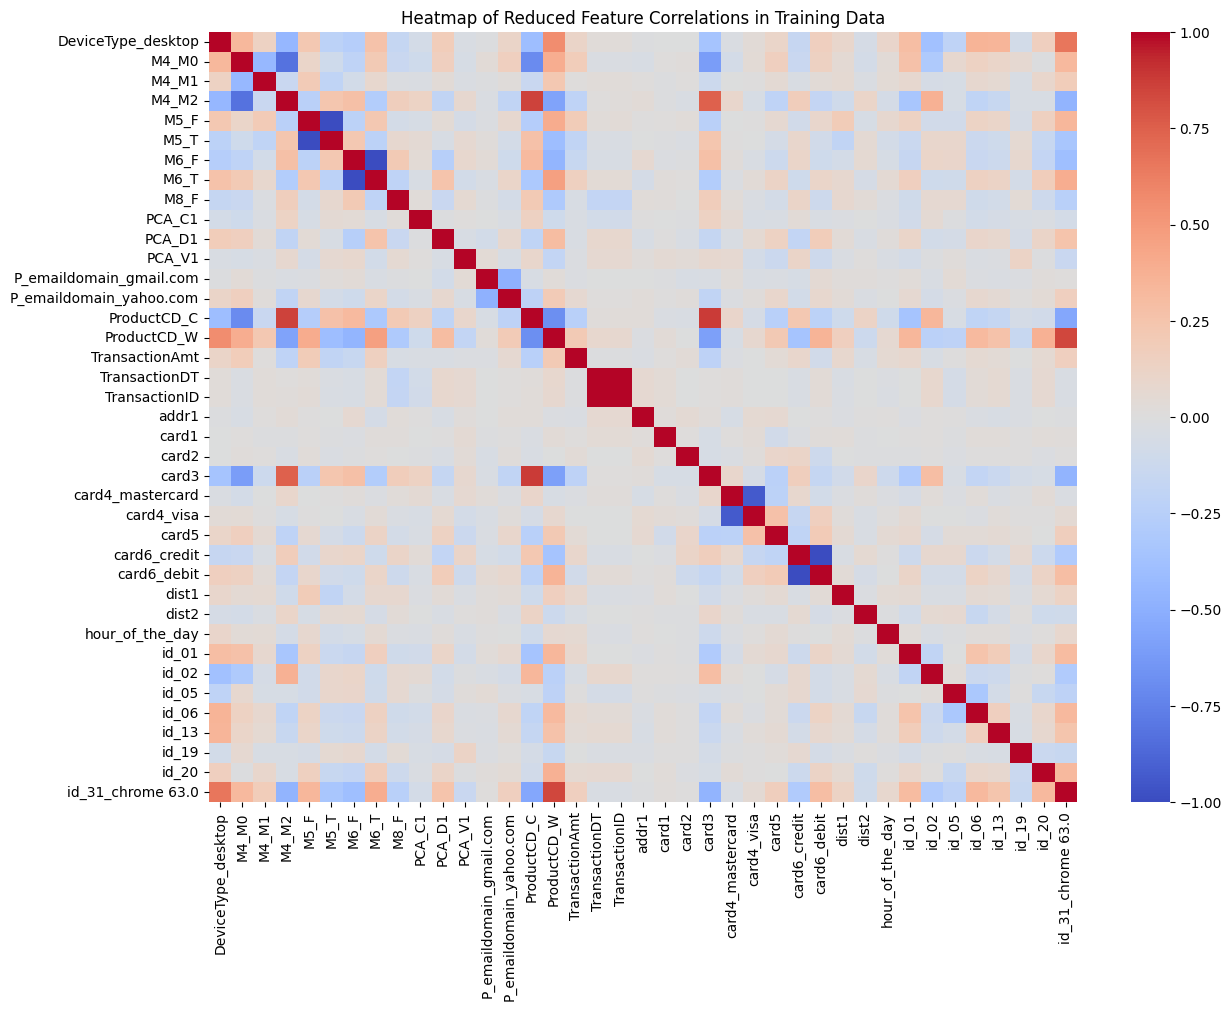

In [ ]:
corr_matrix = x_smp_train_reduced.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Reduced Feature Correlations in Training Data')
plt.show()

In [ ]:

def univariate_logistic_regression(X, y, feature):
    # Prepare the feature column with an intercept
    X_feature = sm.add_constant(X[[feature]])

    # Fit the logistic regression model
    model = sm.Logit(y, X_feature)
    result = model.fit(disp=0)

    # Get the p-value, coefficient, and AUC for the feature
    p_value = result.pvalues[1]
    coeff = result.params[1]
    auc = roc_auc_score(y, result.predict(X_feature))

    return p_value, coeff, auc

# Perform univariate logistic regression for each feature
univariate_results = []

for feature in x_smp_train_reduced.columns:
    p_value, coeff, auc = univariate_logistic_regression(x_smp_train_reduced, y_smp_train, feature)
    univariate_results.append({
        'Feature': feature,
        'Coefficient': coeff,
        'p-value': p_value,
        'AUC': auc
    })

# Convert the results to a DataFrame
univariate_results_transformed = pd.DataFrame(univariate_results)
#print(univariate_results_df.sort_values(by='AUC', ascending=False))

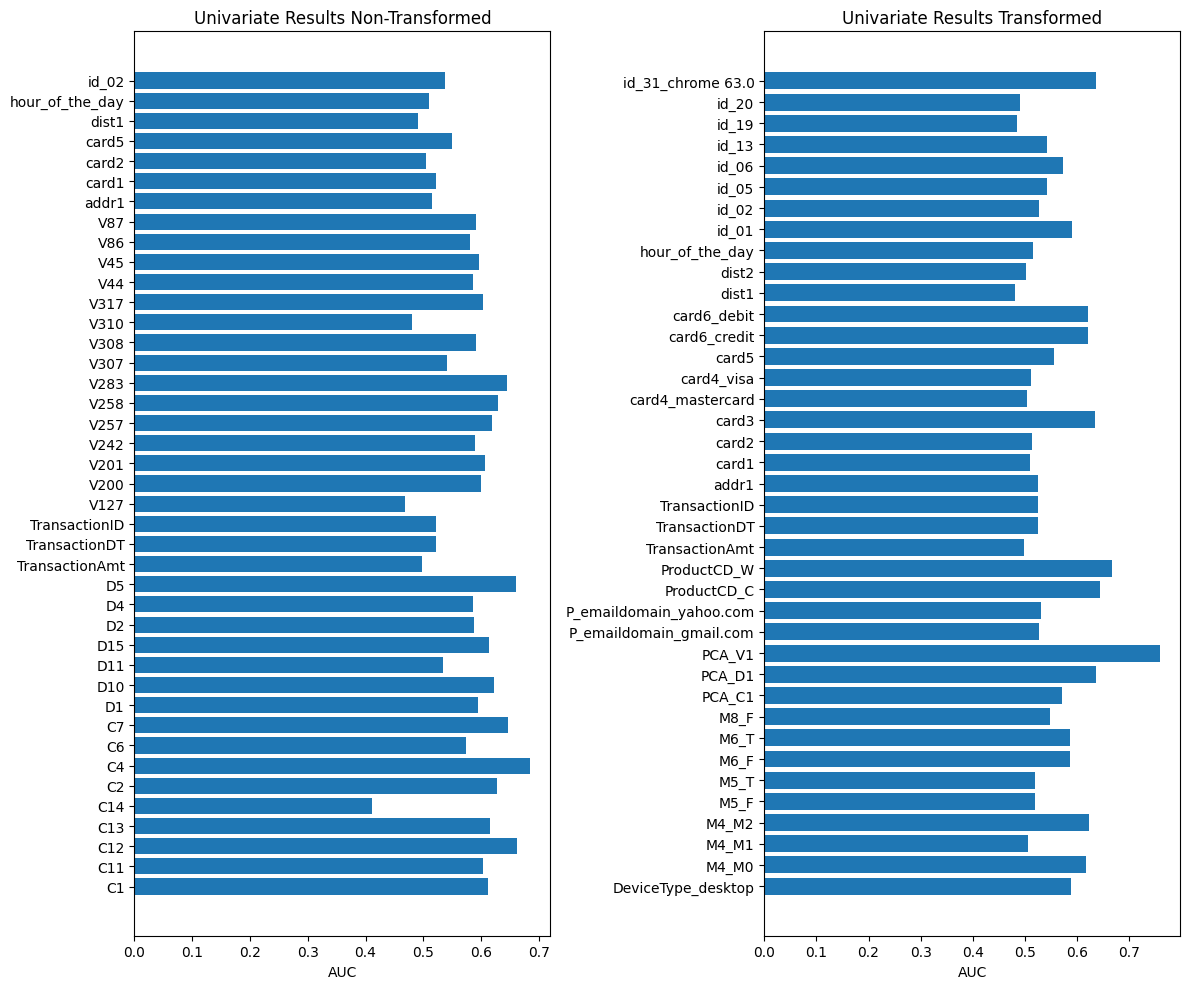

In [ ]:
# Split the data into train and test sets
x_smp_train, x_smp_test, y_smp_train, y_smp_test = train_test_split(
    data.drop('isFraud', axis=1),
    data['isFraud'],
    test_size=0.25,
    random_state=42
)

# Identify categorical and numerical columns excluding PCA columns
pca_columns = [col for col in x_smp_train.columns if col.startswith('PCA')]
categorical_cols = x_smp_train.select_dtypes(include=['object', 'category']).columns.difference(pca_columns)
numerical_cols = x_smp_train.select_dtypes(include=['number']).columns.difference(pca_columns)

# Create imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical data
x_smp_train[numerical_cols] = num_imputer.fit_transform(x_smp_train[numerical_cols])
x_smp_test[numerical_cols] = num_imputer.transform(x_smp_test[numerical_cols])

# Impute categorical data
x_smp_train[categorical_cols] = cat_imputer.fit_transform(x_smp_train[categorical_cols])
x_smp_test[categorical_cols] = cat_imputer.transform(x_smp_test[categorical_cols])

# Apply pd.get_dummies() and combine with original data
x_smp_train = pd.concat([x_smp_train[numerical_cols.union(pca_columns)], pd.get_dummies(x_smp_train[categorical_cols])], axis=1)
x_smp_test = pd.concat([x_smp_test[numerical_cols.union(pca_columns)], pd.get_dummies(x_smp_test[categorical_cols])], axis=1)

# Align the columns in the train and test sets
x_smp_train, x_smp_test = x_smp_train.align(x_smp_test, join='outer', axis=1, fill_value=0)

# Create and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_smp_train, y_smp_train)

# Get the feature importances and select features above the threshold
threshold = 0.005
high_importance_features = x_smp_train.columns[rf.feature_importances_ > threshold]

# Reduce training and testing sets to high importance features
x_smp_train_reduced = x_smp_train[high_importance_features]
x_smp_test_reduced = x_smp_test[high_importance_features]

# Re-train the classifier on the reduced feature set
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(x_smp_train_reduced, y_smp_train)

# Predict the labels for the reduced test data
y_pred_reduced = rf_reduced.predict(x_smp_test_reduced)

# Perform univariate logistic regression for each feature
univariate_results = []

for feature in x_smp_train_reduced.columns:
    p_value, coeff, auc = univariate_logistic_regression(x_smp_train_reduced, y_smp_train, feature)
    univariate_results.append({
        'Feature': feature,
        'Coefficient': coeff,
        'p-value': p_value,
        'AUC': auc
    })

# Convert the results to a DataFrame
univariate_results_non_transformed = pd.DataFrame(univariate_results)

# Create a side-by-side comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.barh(univariate_results_non_transformed['Feature'], univariate_results_non_transformed['AUC'])
plt.xlabel('AUC')
plt.title('Univariate Results Non-Transformed')

plt.subplot(1, 2, 2)
plt.barh(univariate_results_transformed['Feature'], univariate_results_transformed['AUC'])
plt.xlabel('AUC')
plt.title('Univariate Results Transformed')

plt.tight_layout()
plt.show()
